In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한글처리
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 생성
np.random.seed(42)

df = pd.DataFrame(np.random.randn(1000,4),
                  index=pd.date_range('1/1/2021', periods=1000),
                  columns=list('ABCD')
                 )
df

,A,B,C,D
2021-01-01,0.496714,-0.138264,0.647689,1.523030
2021-01-02,-0.234153,-0.234137,1.579213,0.767435
2021-01-03,-0.469474,0.542560,-0.463418,-0.465730
2021-01-04,0.241962,-1.913280,-1.724918,-0.562288
2021-01-05,-1.012831,0.314247,-0.908024,-1.412304
...,...,...,...,...
2023-09-23,1.362563,1.640615,3.152057,-1.123494
2023-09-24,0.242882,-2.082099,0.553149,-0.548200
2023-09-25,1.923446,-0.774615,-1.689183,-0.471264
2023-09-26,-1.975488,0.751099,-2.065083,0.028458


### 1) 기본 막대 차트
- 2021-01-05 날짜로 차트 작성

In [6]:
# 특정 날짜
# 인덱스나 name 명
df.loc['2021-01-05']

A   -1.012831
B    0.314247
C   -0.908024
D   -1.412304
Name: 2021-01-05 00:00:00, dtype: float64

In [8]:
# 특정 날짜 
# 인덱스 번호
df.iloc[4]

A   -1.012831
B    0.314247
C   -0.908024
D   -1.412304
Name: 2021-01-05 00:00:00, dtype: float64

<AxesSubplot:>

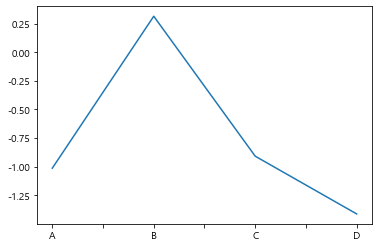

In [9]:
df.iloc[4].plot()

<AxesSubplot:>

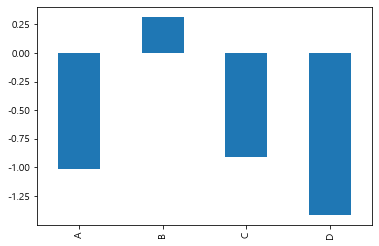

In [10]:
df.iloc[4].plot(kind='bar')

<AxesSubplot:>

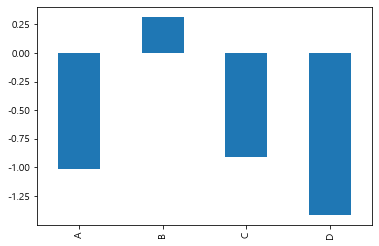

In [12]:
df.iloc[4].plot.bar()

### 2) 가로 축 선 생성

<AxesSubplot:>

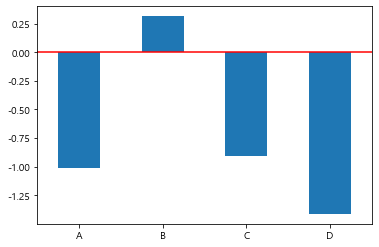

In [14]:
plt.axhline(0, color = 'r')
df.iloc[4].plot.bar(rot=0)

In [16]:
# 간단한 데이터 생성
df = pd.DataFrame(np.random.randn(10,4),columns=list('ABCD'))
df

,A,B,C,D
0,-0.863494,-0.031203,0.018017,0.472630
1,-1.366858,0.592567,-2.704392,-0.629885
2,-0.488274,0.633327,0.022631,-1.405563
3,-0.984993,0.198680,-0.079067,-0.579124
4,-0.480834,0.696168,-0.517693,-0.088091
5,2.169937,-1.423683,-1.851843,0.783590
6,-0.678643,-0.318238,-0.781156,-0.259800
7,1.598538,0.802128,0.862224,-1.416227
8,-1.151154,-2.839079,-0.809381,0.956703
9,0.516947,-0.221513,-0.022300,-0.688886


<AxesSubplot:>

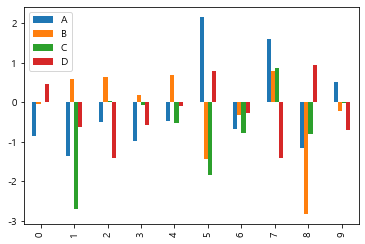

In [17]:
df.plot.bar()

#### 누적막대

<AxesSubplot:>

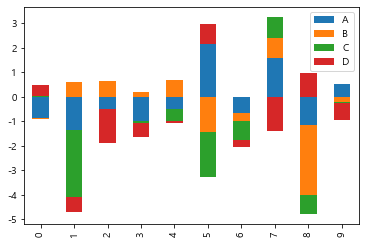

In [18]:
df.plot.bar(stacked = True)

#### 수평막대

<AxesSubplot:>

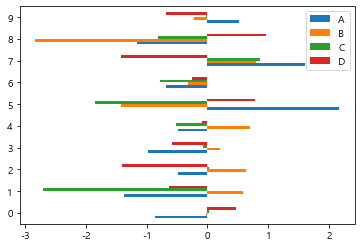

In [19]:
df.plot.barh()

<AxesSubplot:>

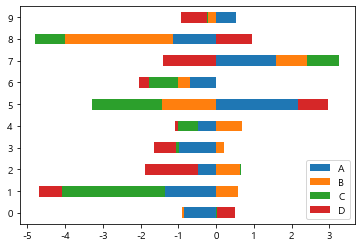

In [20]:
df.plot.barh(stacked = True)

In [21]:
# 생성
df = pd.DataFrame({
    'data1' : [2,3,5,4,3,2,5,5],
    'data2' : [4,6,7,5,6,3,8,5],
    'group' : ['a','a','a','a','b','b','b','b'],
    'sector' : ['ha','ha','ho','ho','ha','ha','ho','ho']
})
df

,data1,data2,group,sector
0,2,4,a,ha
1,3,6,a,ha
2,5,7,a,ho
3,4,5,a,ho
4,3,6,b,ha
5,2,3,b,ha
6,5,8,b,ho
7,5,5,b,ho


#### 인덱스 설정 : group, sector 컬럼

In [24]:
df = df.set_index(['group','sector'])
df

data1  data2
group sector              
a     ha          2      4
      ha          3      6
      ho          5      7
      ho          4      5
b     ha          3      6
      ha          2      3
      ho          5      8
      ho          5      5

#### group, sector 인덱스를 이용해서 groupby 연산 후 mean 적용

In [26]:
avg_df = df.groupby(['group','sector']).mean()
avg_df

data1  data2
group sector              
a     ha        2.5    5.0
      ho        4.5    6.0
b     ha        2.5    4.5
      ho        5.0    6.5

#### 표준편차 구하기
- erros 변수에 담기
- df.groupby(['group','sector']) 기준으로 표준편차

In [29]:
erros = df.groupby(['group','sector']).std()
erros

data1     data2
group sector                    
a     ha      0.707107  1.414214
      ho      0.707107  1.414214
b     ha      0.707107  2.121320
      ho      0.000000  2.121320

<AxesSubplot:xlabel='group,sector'>

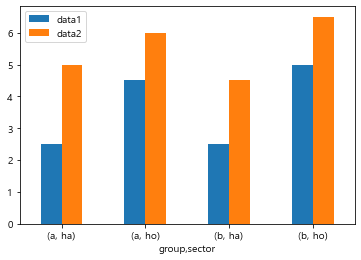

In [30]:
avg_df.plot.bar(rot=0)

<AxesSubplot:xlabel='group,sector'>

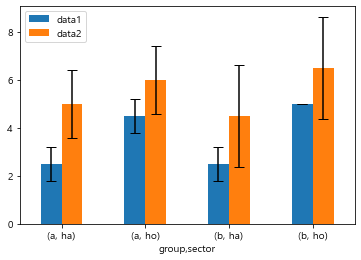

In [31]:
fig, ax = plt.subplots()

avg_df.plot.bar(rot=0, yerr=erros, ax=ax, capsize=5)